In [1]:
import numpy as np
import pandas as pd

print(f'Numpy version: {np.__version__}, Pandas version: {pd.__version__}')

Numpy version: 2.2.1, Pandas version: 2.2.3


## Problem statement

> Find out if there is any correlation between `sqft_living` and `price` for the kc housing dataset. Build a linear regression model based on the finding.

## Column definition

1. `price` - Price of each home sold
2. `sqft_living` - Square footage of the apartments interior living space

In [2]:
# df = pd.read_csv('../dataset/kc_house_data.csv', index_col='id')
df = pd.read_csv('../dataset/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df = df[['sqft_lot', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'price']]

df.head()

,sqft_lot,sqft_living,bedrooms,bathrooms,floors,yr_built,yr_renovated,price
0,5650,1180,3,1.00,1.0,1955,0,221900.0
1,7242,2570,3,2.25,2.0,1951,1991,538000.0
2,10000,770,2,1.00,1.0,1933,0,180000.0
3,5000,1960,4,3.00,1.0,1965,0,604000.0
4,8080,1680,3,2.00,1.0,1987,0,510000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft_lot      21613 non-null  int64  
 1   sqft_living   21613 non-null  int64  
 2   bedrooms      21613 non-null  int64  
 3   bathrooms     21613 non-null  float64
 4   floors        21613 non-null  float64
 5   yr_built      21613 non-null  int64  
 6   yr_renovated  21613 non-null  int64  
 7   price         21613 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [6]:
df.values.T.shape

(8, 21613)

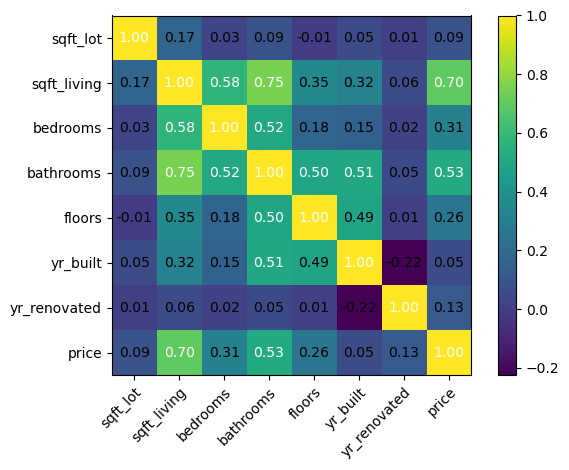

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T, dtype=np.float64)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

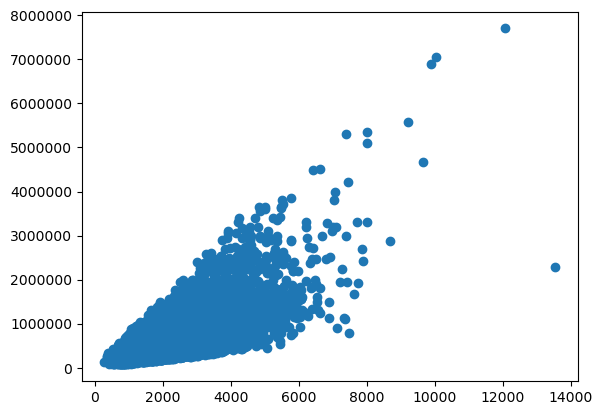

In [9]:
plt.scatter(df.sqft_living, df.price)

# Get the current axis
ax = plt.gca()

# Use ScalarFormatter to format the y-axis
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
ax.yaxis.get_major_formatter().set_scientific(False)

plt.show()

In [10]:
import torch
from torch import nn

In [11]:
torch.__version__

'2.5.1.post201'

In [12]:
X, y = df.sqft_living, df.price

In [13]:
X.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [14]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [15]:
type(X)

pandas.core.series.Series

In [16]:
X = torch.from_numpy(X.to_numpy()).float()
y = torch.from_numpy(y.to_numpy()).float()

In [17]:
type(X)

torch.Tensor

In [18]:
X

tensor([1180., 2570.,  770.,  ..., 1020., 1600., 1020.])

In [19]:
X = X.unsqueeze(dim=1)
y = y.unsqueeze(dim=1)

X[:10], y[:10]

(tensor([[1180.],
         [2570.],
         [ 770.],
         [1960.],
         [1680.],
         [5420.],
         [1715.],
         [1060.],
         [1780.],
         [1890.]]),
 tensor([[ 221900.],
         [ 538000.],
         [ 180000.],
         [ 604000.],
         [ 510000.],
         [1225000.],
         [ 257500.],
         [ 291850.],
         [ 229500.],
         [ 323000.]]))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# 80-20 split for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [22]:
X_train

tensor([[1780.],
        [1000.],
        [1080.],
        ...,
        [2120.],
        [ 380.],
        [3130.]])

In [23]:
X_test

tensor([[2070.],
        [2900.],
        [3770.],
        ...,
        [2434.],
        [2250.],
        [2570.]])

In [24]:
y_train

tensor([[325000.],
        [257000.],
        [228500.],
        ...,
        [575000.],
        [245000.],
        [315000.]])

In [25]:
y_test

tensor([[ 365000.],
        [ 865000.],
        [1038000.],
        ...,
        [ 285000.],
        [ 605000.],
        [ 356500.]])

In [26]:
X.size(), y.size()

(torch.Size([21613, 1]), torch.Size([21613, 1]))

In [27]:
X_train.size(), X_test.size(), y_train.size(), y_test.size()

(torch.Size([17290, 1]),
 torch.Size([4323, 1]),
 torch.Size([17290, 1]),
 torch.Size([4323, 1]))

In [28]:
# Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1
        )


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


torch.manual_seed(42)

model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [29]:
# Check model device
next(model.parameters()).device

device(type='cpu')

In [30]:
next(model.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [31]:
# Loss function
loss_fn = nn.L1Loss() # Mean Absolute Error (L1Loss)

# Optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [32]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

In [33]:
device

device(type='mps')

In [34]:
# Training the model
torch.manual_seed(42)

# Epoch count
epochs = 100

# Move data and model to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

model.to(device)

for epoch in range(epochs):
    model.train()

    # 1.Forward pass (Make predictions)
    y_pred = model(X_train)

    # 2.Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3.Reset the gradients to zero
    optimizer.zero_grad()

    # 4.Compute gradients
    loss.backward()

    # 5.Update model parameter(s) using gradients
    optimizer.step()


    # Put the model in evaluation mode
    model.eval()

    # Testing
    with torch.inference_mode():
        test_pred = model(X_test)

        test_loss = loss_fn(test_pred, y_test)


    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Train loss(MAE): {loss} | Test loss(MAE): {test_loss}')

Epoch: 0 | Train loss(MAE): 536181.6875 | Test loss(MAE): 504125.0625
Epoch: 10 | Train loss(MAE): 192506.890625 | Test loss(MAE): 190501.75
Epoch: 20 | Train loss(MAE): 167223.4375 | Test loss(MAE): 172252.5
Epoch: 30 | Train loss(MAE): 166669.359375 | Test loss(MAE): 171876.78125
Epoch: 40 | Train loss(MAE): 166650.984375 | Test loss(MAE): 171871.125
Epoch: 50 | Train loss(MAE): 166650.71875 | Test loss(MAE): 171871.84375
Epoch: 60 | Train loss(MAE): 166650.703125 | Test loss(MAE): 171871.953125
Epoch: 70 | Train loss(MAE): 166650.703125 | Test loss(MAE): 171871.953125
Epoch: 80 | Train loss(MAE): 166650.703125 | Test loss(MAE): 171871.9375
Epoch: 90 | Train loss(MAE): 166650.703125 | Test loss(MAE): 171871.953125


In [35]:
def plot_predictions(train_data=X_train.cpu(), 
                     train_labels=y_train.cpu(), 
                     test_data=X_test.cpu(), 
                     test_labels=y_test.cpu(), 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

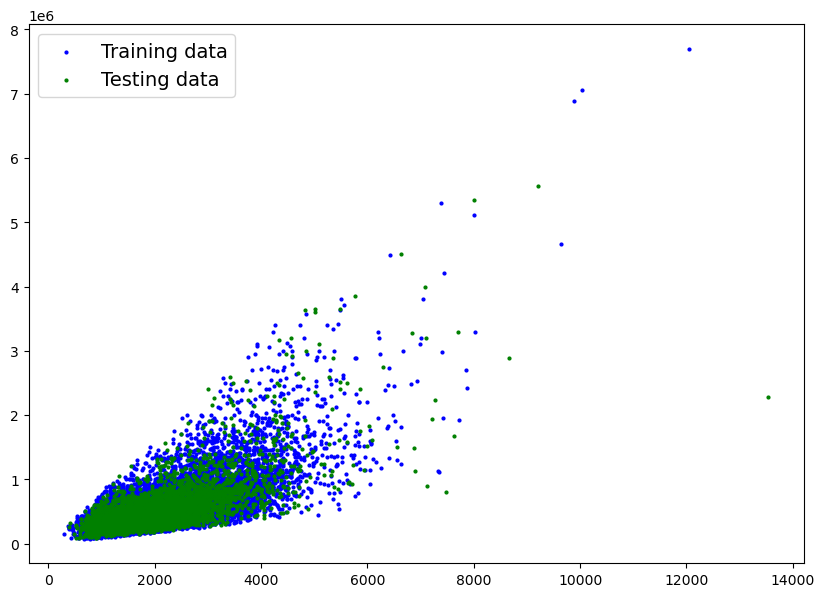

In [36]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

In [37]:
# Making predictions
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[498038.9688],
        [697735.3750],
        [907055.6875],
        ...,
        [585616.6875],
        [541346.6250],
        [618338.0625]], device='mps:0')

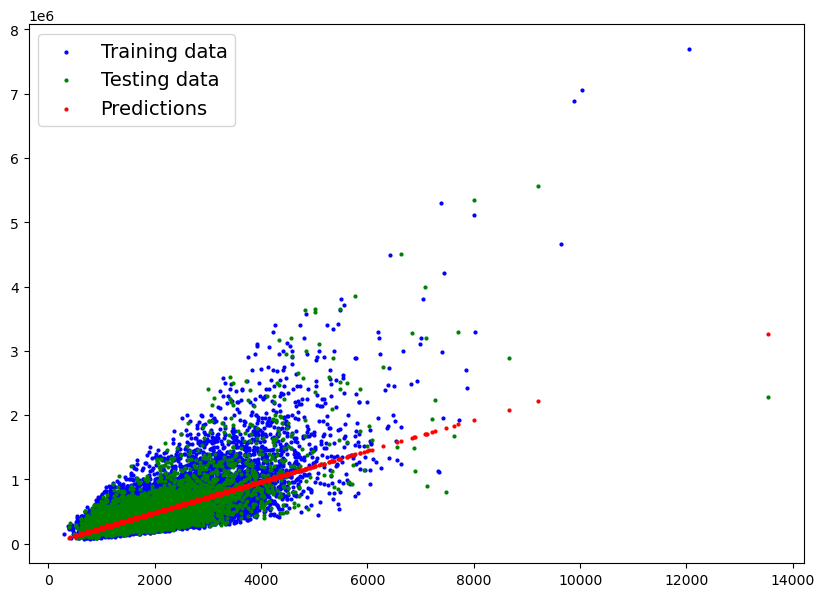

In [38]:
plot_predictions(predictions=y_preds.cpu())

In [39]:
from torchmetrics import R2Score

y_train_pred = model(X_train)
y_test_pred = model(X_test)

r2 = R2Score()

r2_train = r2(y_train_pred.squeeze(), y_train.squeeze())
r2_test = r2(y_test_pred.squeeze(), y_test.squeeze())

print(f'R^2 (train): {r2_train:.2f}, R^2 (test): {r2_test:.2f}')

R^2 (train): 0.47, R^2 (test): 0.47
